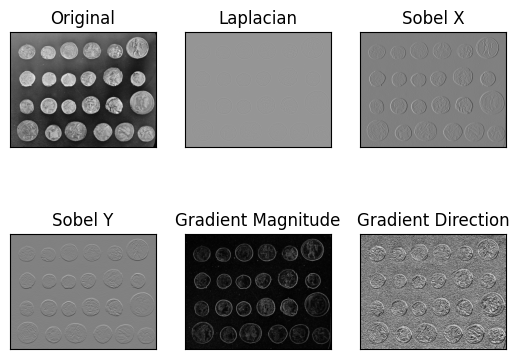

Gradient Magnitude:
[[  0.         474.         252.         ...   4.           2.
    0.        ]
 [288.         484.86905449 170.55790805 ...  15.55634919  11.3137085
    2.        ]
 [230.         312.16021527  63.63961031 ...  22.13594362  22.13594362
    4.        ]
 ...
 [ 14.          12.64911064  39.59797975 ...   0.           0.
    0.        ]
 [ 10.          12.64911064  40.02499219 ...   0.           0.
    0.        ]
 [  0.          18.          32.         ...   0.           0.
    0.        ]]

Gradient Direction:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.57079633  0.51070426  0.50823746 ...  0.78539816  2.35619449
  -1.57079633]
 [ 1.57079633  0.45791701  0.78539816 ...  0.32175055  2.8198421
   1.57079633]
 ...
 [-1.57079633 -1.24904577 -2.35619449 ...  0.          0.
   0.        ]
 [-1.57079633 -0.32175055  2.91479381 ...  0.          0.
   0.        ]
 [ 0.          0.          3.14159265 ...  0.          0.
   0.        ]]


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_filter(image, kernel):
    return cv2.filter2D(image, cv2.CV_64F, kernel)

sobel_x_kernel = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1],
                                [0,  0,  0],
                                [1,  2,  1]])

def compute_gradient_magnitude(gr_image):
    sobelx = apply_filter(gr_image, sobel_x_kernel)
    sobely = apply_filter(gr_image, sobel_y_kernel)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    return magnitude

def compute_gradient_direction(gr_image):
    sobelx = apply_filter(gr_image, sobel_x_kernel)
    sobely = apply_filter(gr_image, sobel_y_kernel)
    direction = np.arctan2(sobely, sobelx)
    return direction

# Load image
img = cv2.imread('/content/data/coins.jpg', 0)

# Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Compute gradient magnitude and direction
gradient_magnitude = compute_gradient_magnitude(img)
gradient_direction = compute_gradient_direction(img)

sobelx = apply_filter(img, sobel_x_kernel)
sobely = apply_filter(img, sobel_y_kernel)

# Plot results
plt.subplot(2,3,1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6), plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction'), plt.xticks([]), plt.yticks([])

plt.show()

print("Gradient Magnitude:")
print(gradient_magnitude)

print("\nGradient Direction:")
print(gradient_direction)

Red Channel Histogram:
 [49224. 57751. 28725. 24912. 20046. 14445. 12157. 12922. 11989.  8168.
  5774.  5541.  5756.  6087.  8060. 22443.]
Green Channel Histogram:
 [  139.  6027. 25579. 28735. 16937. 11161. 14049. 21972. 23359. 23782.
 24845. 24652. 22824. 17622. 14027. 18290.]
Blue Channel Histogram:
 [ 5010. 50379. 20664. 13587. 21538. 28585. 26333. 23024. 18424. 16408.
 14278. 10036.  7833.  7131.  8551. 22219.]


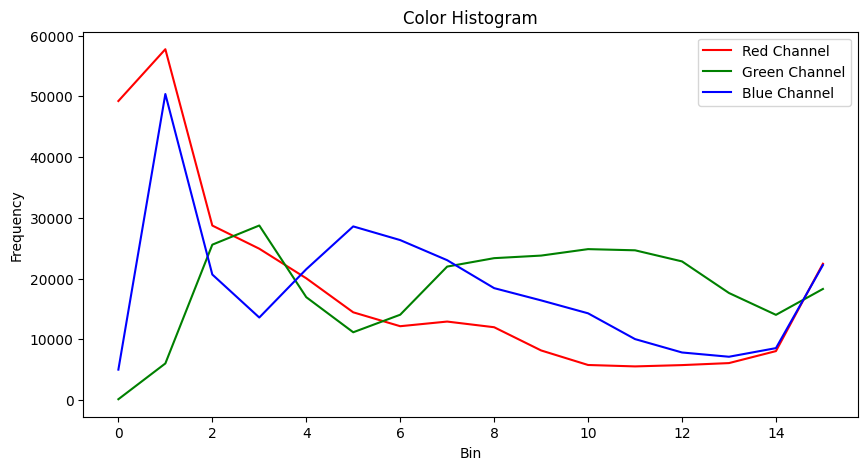

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_colour_histogram(image, num_bins):
    """
    Computes the colour histogram of an input image.

    Parameters:
    image (numpy.ndarray): A 3D numpy array of shape (height, width, 3) with values in [0, 255].
    num_bins (int): The number of bins to use for each channel.

    Returns:
    tuple: Three 1D numpy arrays representing the histograms for the R, G, and B channels.
    """
    # Split the image into R, G, B channels
    b_channel, g_channel, r_channel = cv2.split(image)

    # Compute histograms for each channel
    hist_r = cv2.calcHist([r_channel], [0], None, [num_bins], [0, 256]).flatten()
    hist_g = cv2.calcHist([g_channel], [0], None, [num_bins], [0, 256]).flatten()
    hist_b = cv2.calcHist([b_channel], [0], None, [num_bins], [0, 256]).flatten()

    return hist_r, hist_g, hist_b

# Load image
image = cv2.imread('/content/data/flower.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Compute histograms
num_bins = 16
hist_r, hist_g, hist_b = compute_colour_histogram(image, num_bins)

# Print histogram arrays
print("Red Channel Histogram:\n", hist_r)
print("Green Channel Histogram:\n", hist_g)
print("Blue Channel Histogram:\n", hist_b)

# Plot histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('Color Histogram')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [5]:
import numpy as np

def compute_transform_matrix(points, theta, scale, tx, ty):
    """
    Computes a 3x3 transformation matrix that applies rotation, scaling, and translation.

    Parameters:
    points (numpy.ndarray): A 2D numpy array of shape (N, 2) containing points.
    theta (float): Rotation angle in degrees (counterclockwise).
    scale (float): Uniform scaling factor.
    tx (float): Translation in x-direction.
    ty (float): Translation in y-direction.

    Returns:
    numpy.ndarray: A 3x3 transformation matrix.
    """
    # Convert theta to radians
    theta_rad = np.radians(theta)

    # Compute the centroid of the points
    centroid = np.mean(points, axis=0)
    cx, cy = centroid

    # Rotation matrix
    cos_t = np.cos(theta_rad)
    sin_t = np.sin(theta_rad)
    rotation_matrix = np.array([[cos_t, -sin_t, 0],
                                [sin_t,  cos_t, 0],
                                [0,      0,     1]])

    # Scaling matrix
    scaling_matrix = np.array([[scale, 0,     0],
                                [0,    scale, 0],
                                [0,    0,     1]])

    # Translation matrix
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0,  1]])

    # Move points to origin (centroid at origin)
    to_origin = np.array([[1, 0, -cx],
                           [0, 1, -cy],
                           [0, 0,  1]])

    # Move points back after transformation
    back_to_position = np.array([[1, 0, cx],
                                  [0, 1, cy],
                                  [0, 0,  1]])

    # Compute final transformation matrix
    transform_matrix = translation_matrix @ back_to_position @ scaling_matrix @ rotation_matrix @ to_origin

    return transform_matrix

# Load points
points = np.load('/content/data/points.npy')

# Define transformation parameters
theta = 30  # Rotation angle in degrees
scale = 1.5  # Scaling factor
tx, ty = 10, -5  # Translation in x and y directions

# Compute transformation matrix
transformation_matrix = compute_transform_matrix(points, theta, scale, tx, ty)

# Print result
print("Transformation Matrix:")
print(transformation_matrix)



Transformation Matrix:
[[   1.29903811   -0.75        383.66729112]
 [   0.75          1.29903811 -594.50805483]
 [   0.            0.            1.        ]]


Original: [295 966], Transformed: [ 42.38353229 881.61275525]
Original: [325 760], Transformed: [235.85467546 636.51090548]
Original: [434 888], Transformed: [281.44982898 884.53778301]
Original: [ 53 549], Transformed: [ 40.76631072 158.41386518]
Original: [474 520], Transformed: [609.41135321 436.49176012]


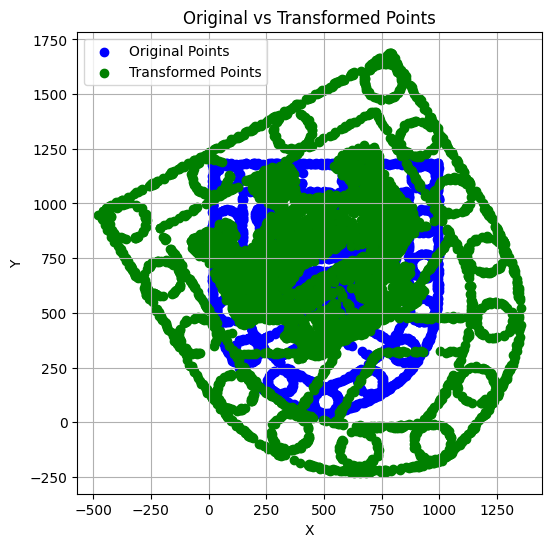

Transformation Matrix:
[[   1.29903811   -0.75        383.66729112]
 [   0.75          1.29903811 -594.50805483]
 [   0.            0.            1.        ]]


In [6]:
import matplotlib.pyplot as plt

def apply_transformation(points, transformation_matrix):
    # Convert points to homogeneous coordinates (N x 3)
    ones = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack([points, ones])  # Shape: (N, 3)

    # Apply the transformation
    transformed_points = homogeneous_points @ transformation_matrix.T  # (N, 3)

    # Convert back to 2D coordinates
    return transformed_points[:, :2]

# Apply the transformation
transformed_points = apply_transformation(points, transformation_matrix)

# Print a few original and transformed points for comparison
for i in range(min(5, len(points))):  # Print first 5 points
    print(f"Original: {points[i]}, Transformed: {transformed_points[i]}")
plt.figure(figsize=(6,6))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Original Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], color='green', label='Transformed Points')
plt.legend()
plt.title("Original vs Transformed Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

print("Transformation Matrix:")
print(transformation_matrix)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from ca_utils import ResNet, BasicBlock  # Custom ResNet implementation

def train_cnn():
    """
    Train a ResNet model on a subset of CIFAR-10 consisting of animal classes.
    """
    # Define data augmentations for training and normalization for validation
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load CIFAR-10 dataset
    dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)

    # Select animal classes
    animal_classes = {'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7}
    animal_indices = [i for i, (_, label) in enumerate(dataset) if label in animal_classes.values()]

    # Split dataset into training and validation (80-20 split)
    train_idx, val_idx = train_test_split(animal_indices, test_size=0.2, random_state=42)

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_subset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

    # Initialize model, loss function, and optimizer
    model = ResNet(block=BasicBlock, layers=[1, 1, 1], num_classes=6).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Training loop
    best_val_acc = 0.0
    num_epochs = 70

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            labels = torch.tensor([list(animal_classes.values()).index(label.item()) for label in labels]).cuda()

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_acc = 100.0 * correct / total
        print(f"Epoch {epoch+1}: Loss={total_loss / len(train_loader):.4f}, Train Acc={train_acc:.2f}%")

        # Validation phase
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.cuda(), labels.cuda()
                labels = torch.tensor([list(animal_classes.values()).index(label.item()) for label in labels]).cuda()

                outputs = model(images)
                correct += (outputs.argmax(1) == labels).sum().item()
                total += labels.size(0)

        val_acc = 100.0 * correct / total
        print(f"Validation Acc={val_acc:.2f}%")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'data/weights_resnet.pth')
            print("Best model saved!")

    print("Training complete.")

# Run the training function
train_cnn()


Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1: Loss=1.4713, Train Acc=40.64%
Validation Acc=46.32%
Best model saved!
Epoch 2: Loss=1.2182, Train Acc=52.66%
Validation Acc=52.78%
Best model saved!
Epoch 3: Loss=1.1220, Train Acc=57.11%
Validation Acc=55.22%
Best model saved!
Epoch 4: Loss=1.0475, Train Acc=60.54%
Validation Acc=58.12%
Best model saved!
Epoch 5: Loss=0.9860, Train Acc=62.88%
Validation Acc=56.92%
Epoch 6: Loss=0.9429, Train Acc=64.62%
Validation Acc=63.58%
Best model saved!
Epoch 7: Loss=0.8821, Train Acc=67.24%
Validation Acc=59.18%
Epoch 8: Loss=0.8528, Train Acc=68.68%
Validation Acc=67.37%
Best model saved!
Epoch 9: Loss=0.8205, Train Acc=69.90%
Validation Acc=64.92%
Epoch 10: Loss=0.7992, Train Acc=70.76%
Validation Acc=69.07%
Best model saved!
Epoch 11: Loss=0.7690, Train Acc=71.98%
Validation Acc=69.48%
Best model saved!
Epoch 12: Loss=0.7461, Train Acc=72.85%
Validation Acc=71.77%
Best model saved!
Epoch 13: Loss=0.7311, Train Acc=73.56%
Validation Acc=73.08%
Best model saved!
Epoch 14: Loss=0.7130, 

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
from torch.utils.data import DataLoader, Subset
from ca_utils import ResNet, BasicBlock  # Ensure this module is available

# Define the relevant CIFAR-10 animal classes and their remapped indices
ANIMAL_CLASSES = {"bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7}
CLASS_MAPPING = {v: i for i, v in enumerate(ANIMAL_CLASSES.values())}  # Convert to 0-5 index range

def test_cnn():
    """
    Evaluate a pre-trained ResNet model on the animal classes from the CIFAR-10 test dataset.

    Returns:
        - predictions: A numpy array containing predicted labels (mapped to range 0-5)
        - accuracy: The classification accuracy in percentage
    """
    # Define preprocessing transformations for test data
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load CIFAR-10 test set
    test_dataset = datasets.CIFAR10(root="./data", train=False, transform=test_transform, download=True)

    # Extract indices of samples belonging to animal classes
    selected_indices = [i for i, (_, label) in enumerate(test_dataset) if label in ANIMAL_CLASSES.values()]
    test_subset = Subset(test_dataset, selected_indices)

    # Initialize data loader
    test_loader = DataLoader(test_subset, batch_size=64, shuffle=False, num_workers=4)

    # Load the trained model and set it to evaluation mode
    model = ResNet(block=BasicBlock, layers=[1, 1, 1], num_classes=6).cuda()
    model.load_state_dict(torch.load("data/weights_resnet.pth"))  # Ensure correct model path
    model.eval()

    correct_predictions, total_samples = 0, 0
    predictions_list = []

    # Perform model inference
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.cuda(), labels.cuda()

            # Remap labels to range 0-5 based on predefined class mapping
            labels = torch.tensor([CLASS_MAPPING[label.item()] for label in labels]).cuda()

            outputs = model(images)
            predicted_labels = outputs.argmax(dim=1)  # Get index of highest probability

            predictions_list.extend(predicted_labels.cpu().numpy())
            correct_predictions += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = (correct_predictions / total_samples) * 100
    return np.array(predictions_list, dtype=np.int64), accuracy

# Example usage:
predictions, acc = test_cnn()
print("Accuracy:", acc)
print("Predictions:", predictions)


Files already downloaded and verified


<ipython-input-2-f417ea217895>:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("data/weights_resnet.pth"))  # Ensure correct model path


Accuracy: 81.10000000000001
Predictions: [1 4 4 ... 1 3 5]
